# First sample, classification kind of iris

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys iris_dataset: \n{}".format(iris_dataset.keys()))

Keys iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
print(iris_dataset['DESCR'][:193] + "\n...") # description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [3]:
print("target's name {}".format(iris_dataset['target_names']))

target's name ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, )

In [5]:
print("array shape X_train: {}, y_train: {}, X_test: {}, y_test: {}".
      format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

array shape X_train: (112, 4), y_train: (112,), X_test: (38, 4), y_test: (38,)


### visualize that data

In [18]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 12
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

import seaborn as sns
sns.set_style("whitegrid")

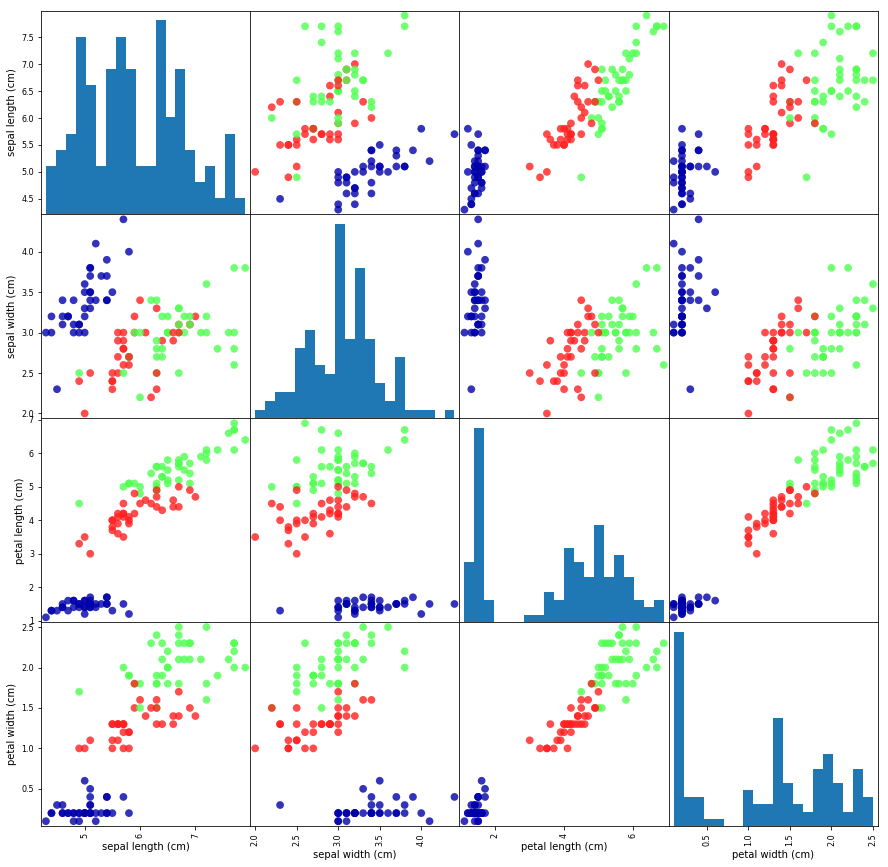

In [9]:
import matplotlib.pyplot as plt
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                                hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

### method KneighborClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print('shape of sample {}'.format(X_new.shape))

shape of sample (1, 4)


In [12]:
prediction = knn.predict(X_new)
print("prediction: {}".format(prediction))
print("value of prediction: {}".format(iris_dataset['target_names'][prediction]))

prediction: [0]
value of prediction: ['setosa']


In [13]:
knn.score(X_test, y_test),      knn.score(X_test, y_test) == np.mean(knn.predict(X_test) == y_test)

(0.9736842105263158, True)

# Supervised learning algorithms

### some datasets and their visualisation

In [10]:
X, y = mglearn.datasets.make_forge()

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
%matplotlib inline

Shape of array X: (26, 2)


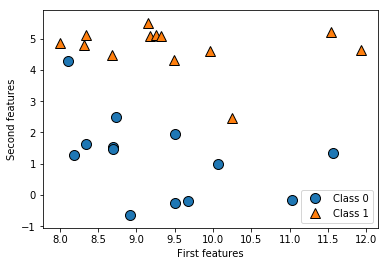

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First features")
plt.ylabel("Second features")
print("Shape of array X: {}".format(X.shape))

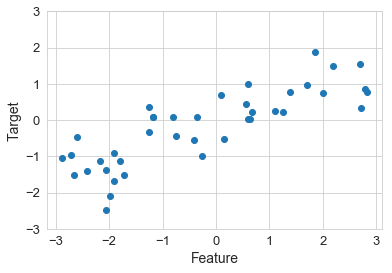

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Keys cancer(): \n{}".format(cancer.keys()))
print("Shape of array: {}".format(cancer.data.shape))

Keys cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of array: (569, 30)


In [19]:
print("Number of elements for every class: \n{}".format({n: v for n, v in zip(cancer.target_names,
                                                                              np.bincount(cancer.target))}))

Number of elements for every class: 
{'malignant': 212, 'benign': 357}


In [20]:
print("Names of features: \n{}".format(cancer.feature_names))

Names of features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Shape of array for datasets BOSTON: {}".format(boston.data.shape))

Shape of array for datasets BOSTON: (506, 13)


In [22]:
X, y = mglearn.datasets.load_extended_boston()
print("Shape of this array: {}".format(X.shape))

Shape of this array: (506, 104)


## Method K-neighbour

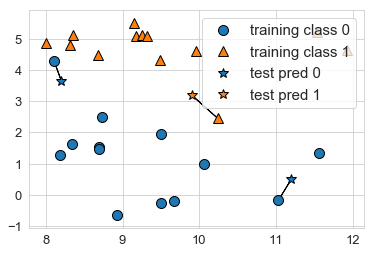

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

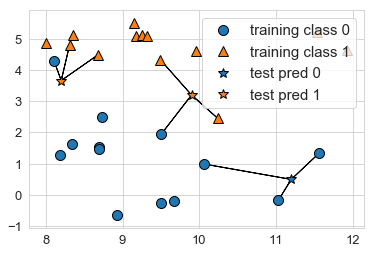

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [25]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [27]:
print("Accuracy on test dataset is {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test dataset is 0.86


### Analysis of method KNeighborsClassifier

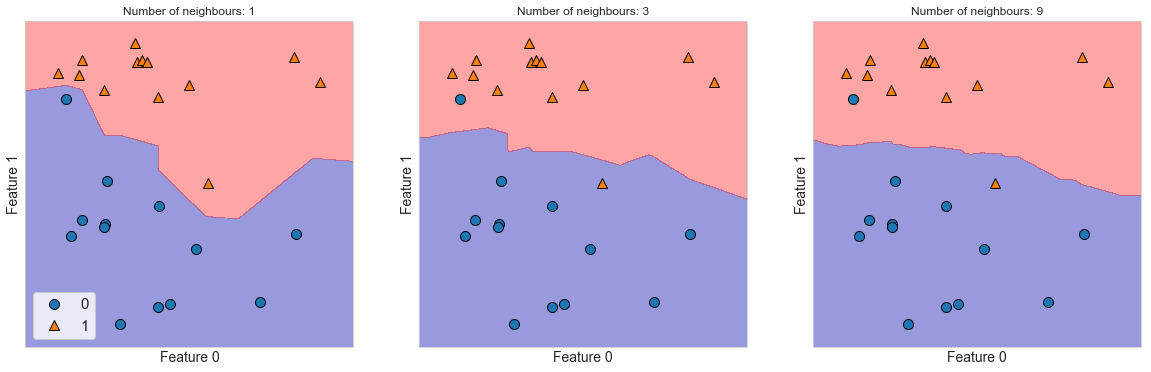

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for n_neighbour, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbour).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Number of neighbours: {}".format(n_neighbour))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc='best')

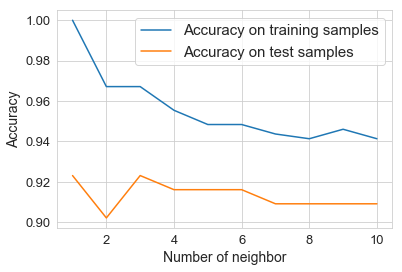

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbor in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy on training samples")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy on test samples")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbor")
plt.legend()

## KNeighborsRegressor

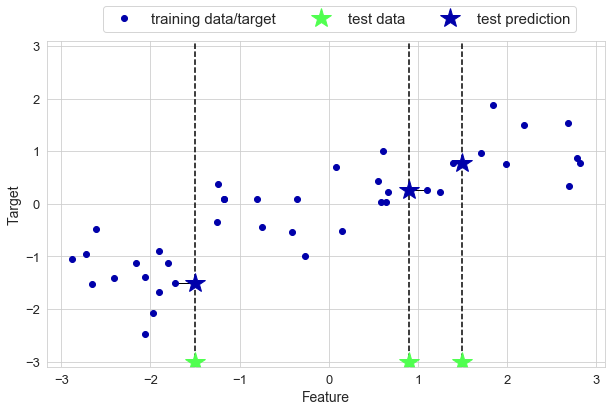

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

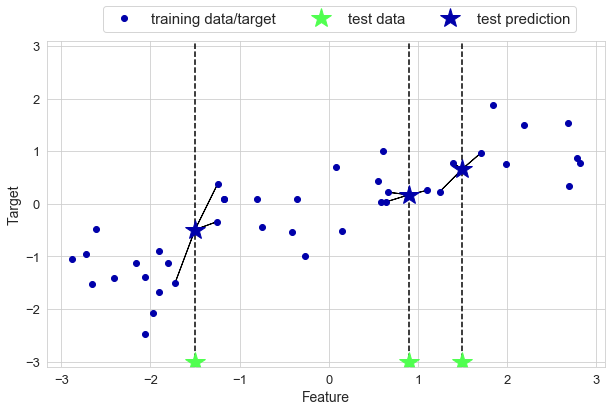

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [88]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Prediction for test dataset: \n{}".format(reg.predict(X_test)))
print("R^2 mistake on test dataset: \n{}".format(reg.score(X_test, y_test)))

Prediction for test dataset: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 mistake on test dataset: 
0.8344172446249604


### Analysis of method KNeighborsRegressor

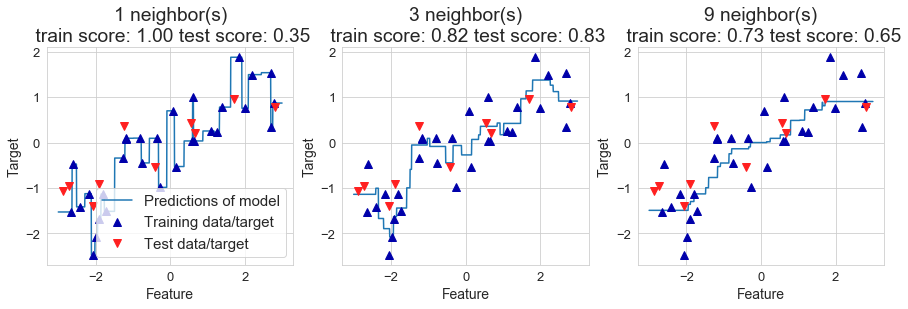

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Predictions of model", "Training data/target", "Test data/target"], loc='best')

## Linear Models for regression

w[0]: 0.393906  b: -0.031804


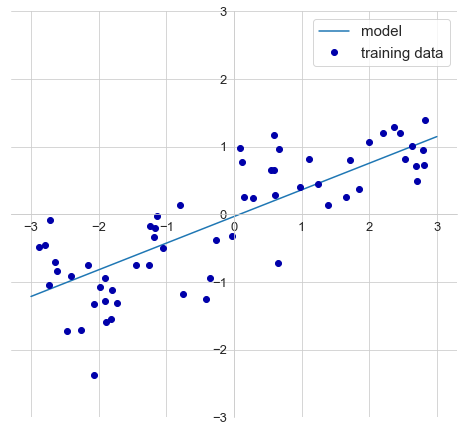

In [60]:
mglearn.plots.plot_linear_regression_wave()

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.44153666]
lr.intercept_: -0.01711124414733381


In [40]:
print("Accuracy on train data: {:.2f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(lr.score(X_test, y_test)))

Accuracy on train data: 0.66
Accuracy on test data: 0.69


In [41]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Accuracy on train data: {:.2f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(lr.score(X_test, y_test)))

Accuracy on train data: 0.95
Accuracy on test data: 0.61


### Ridge(L2 regularization)

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Accuracy on train data: {:.2f}".format(ridge.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(ridge.score(X_test, y_test)))

Accuracy on train data: 0.89
Accuracy on test data: 0.75


In [47]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Accuracy on train data: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(ridge10.score(X_test, y_test)))

Accuracy on train data: 0.79
Accuracy on test data: 0.64


In [48]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Accuracy on train data: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(ridge01.score(X_test, y_test)))

Accuracy on train data: 0.93
Accuracy on test data: 0.77


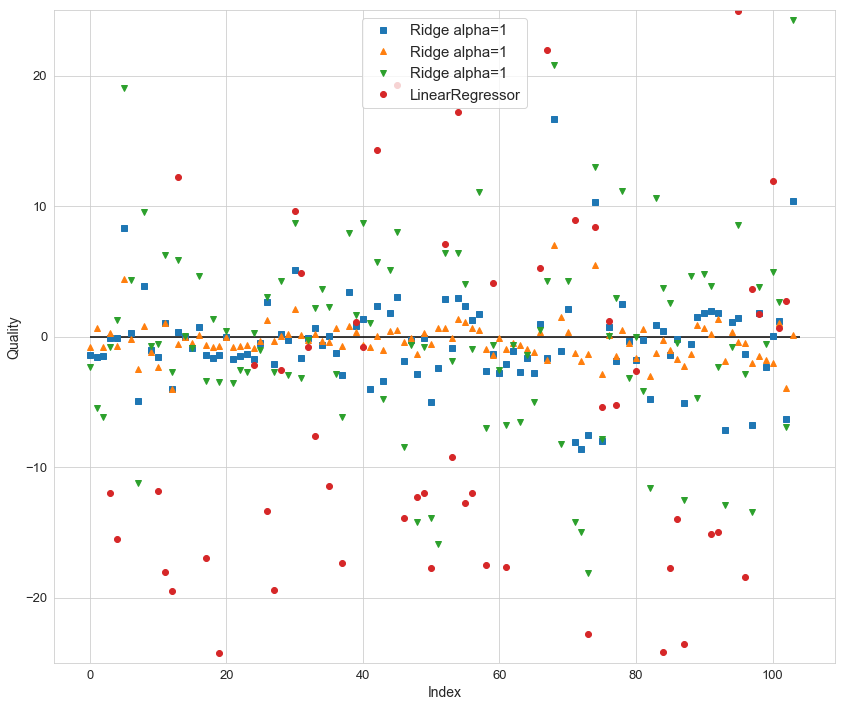

In [63]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=1")
plt.plot(lr.coef_, 'o', label="LinearRegressor")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.ylim(-25, 25)
plt.hlines(0, 0, len(lr.coef_))
plt.legend(loc='best')

### Lasso(L1 regularization)

In [70]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Number of using features: {}".format(np.sum(lasso.coef_!=0)))
print("Accuracy on train data: {:.2f}".format(lasso.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(lasso.score(X_test, y_test)))

Number of using features: 4
Accuracy on train data: 0.29
Accuracy on test data: 0.21


In [77]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Number of using features: {}".format(np.sum(lasso001.coef_!=0)))
print("Accuracy on train data: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(lasso001.score(X_test, y_test)))

Number of using features: 33
Accuracy on train data: 0.90
Accuracy on test data: 0.77


In [78]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Number of using features: {}".format(np.sum(lasso00001.coef_!=0)))
print("Accuracy on train data: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(lasso00001.score(X_test, y_test)))

Number of using features: 96
Accuracy on train data: 0.95
Accuracy on test data: 0.64


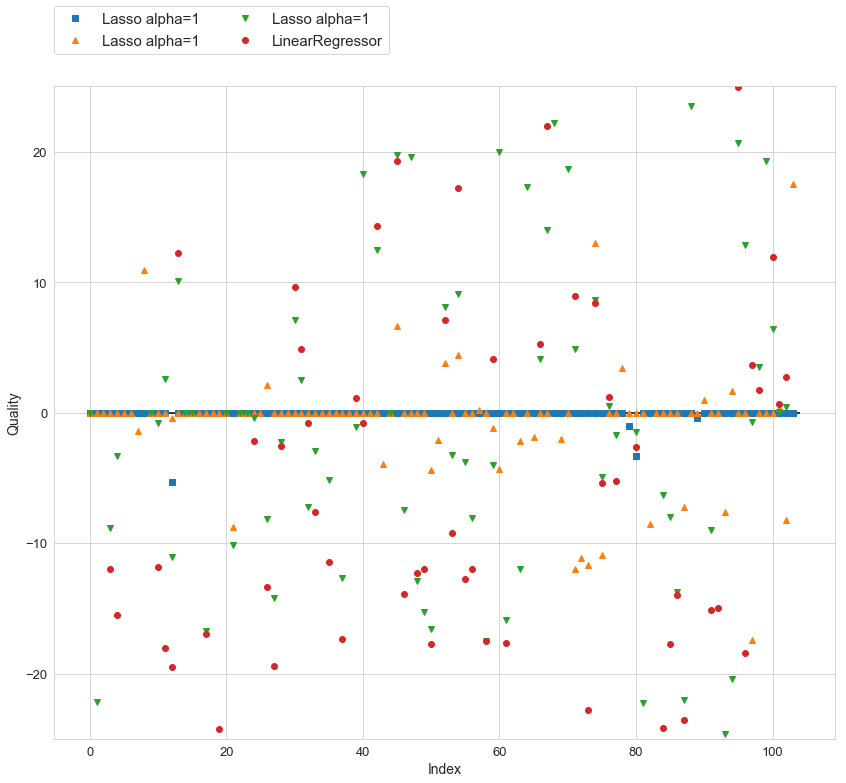

In [97]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=1")
plt.plot(lr.coef_, 'o', label="LinearRegressor")
plt.xlabel("Index")
plt.ylabel("Quality")
plt.ylim(-25, 25)
plt.hlines(0, 0, len(lr.coef_))
plt.legend(ncol=2, loc=(0, 1.05))

### ElasticNet(read about it in the Internet)

## Linear Model for classification

### LogisticRegression, Linear SVC

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


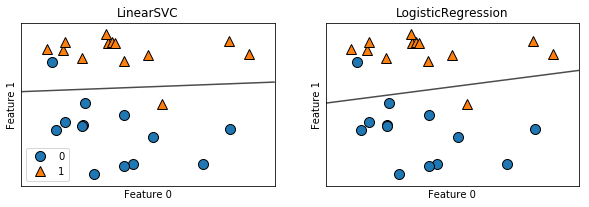

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

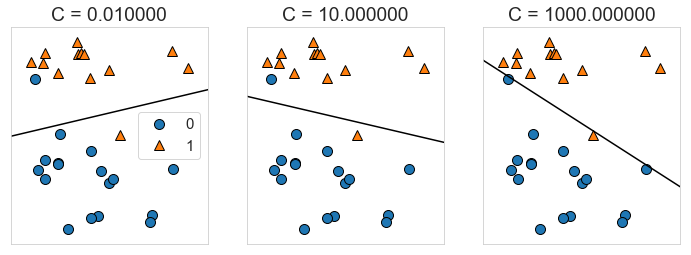

In [103]:
mglearn.plots.plot_linear_svc_regularization()

In [130]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Accuracy on training data is {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test data is {:.3f}".format(logreg.score(X_test, y_test)))


Accuracy on training data is 0.953
Accuracy on test data is 0.958


c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Accuracy on training data is {:.3f}".format(logreg100.score(X_train, y_train)))
print("Accuracy on test data is {:.3f}".format(logreg100.score(X_test, y_test)))


c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data is 0.972
Accuracy on test data is 0.965


In [134]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Accuracy on training data is {:.3f}".format(logreg001.score(X_train, y_train)))
print("Accuracy on test data is {:.3f}".format(logreg001.score(X_test, y_test)))


Accuracy on training data is 0.934
Accuracy on test data is 0.930


c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


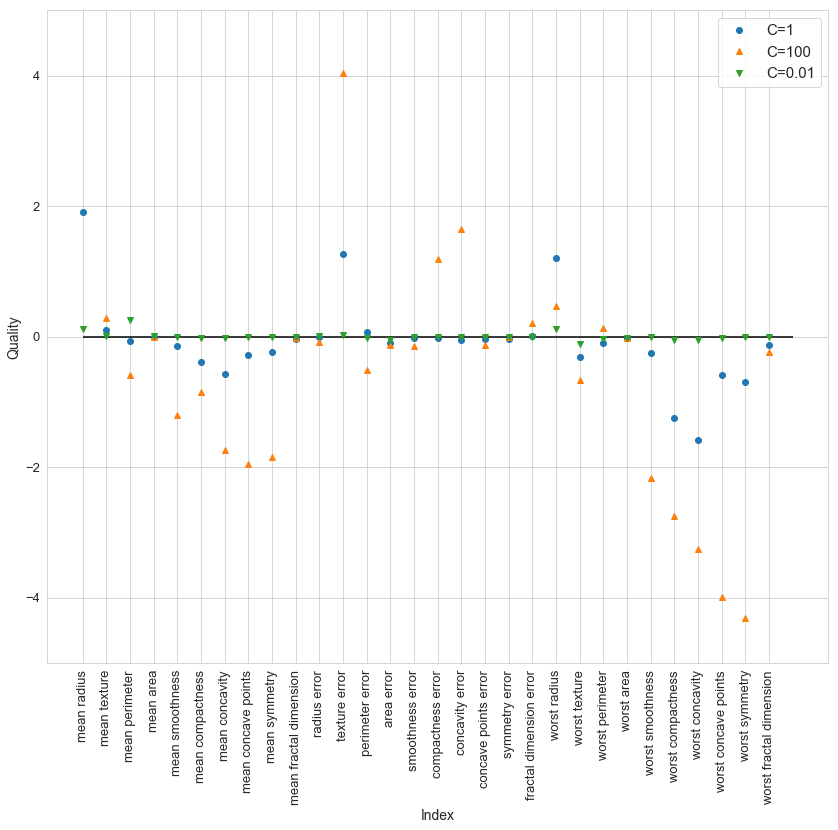

In [140]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Index")
plt.ylabel("Quality")
plt.legend()

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data for logregression l1 with C=0.001: 0.91
Accuracy on test data for logregression l1 with C=0.001: 0.92


c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy on training data for logregression l1 with C=1: 0.96
Accuracy on test data for logregression l1 with C=1: 0.96
Accuracy on training data for logregression l1 with C=100: 0.99
Accuracy on test data for logregression l1 with C=100: 0.98


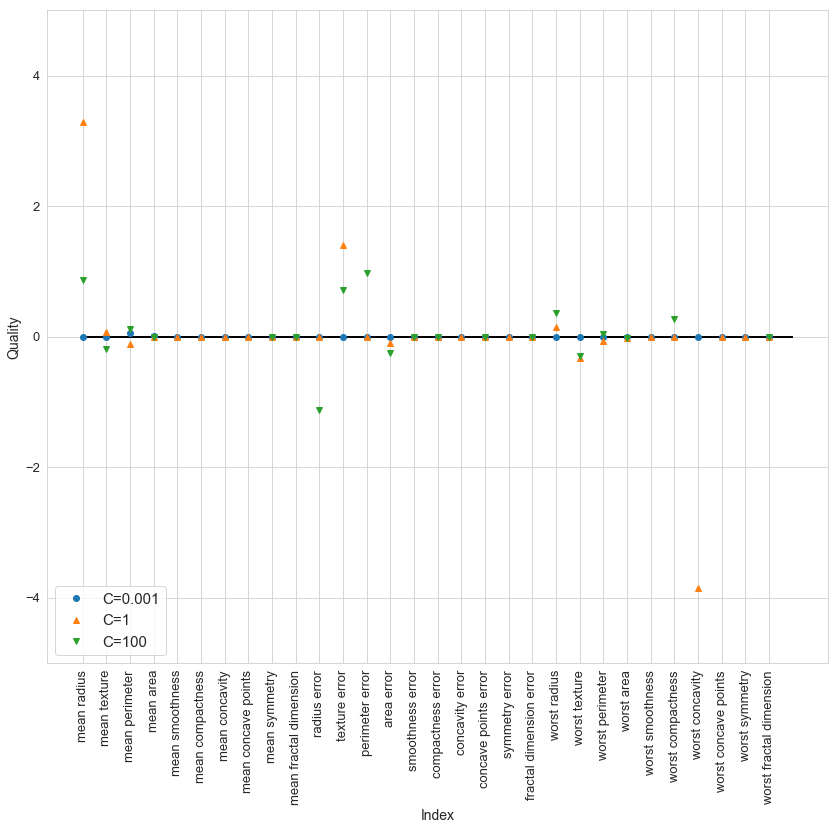

In [144]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Accuracy on training data for logregression l1 with C={}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Accuracy on test data for logregression l1 with C={}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Index")
    plt.ylabel("Quality")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

## Linear Models for multi-class

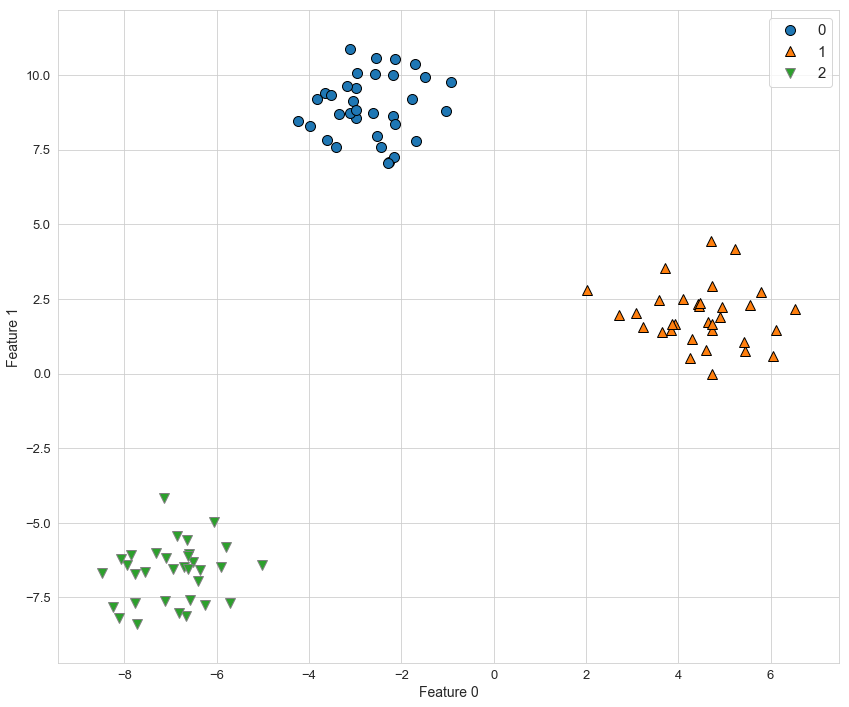

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend()

In [14]:
linear_svm = LinearSVC().fit(X, y)
print("Shape of coefficient: {}".format(linear_svm.coef_.shape))
print("Shape of intercept:", linear_svm.intercept_.shape)

Shape of coefficient: (3, 2)
Shape of intercept: (3,)


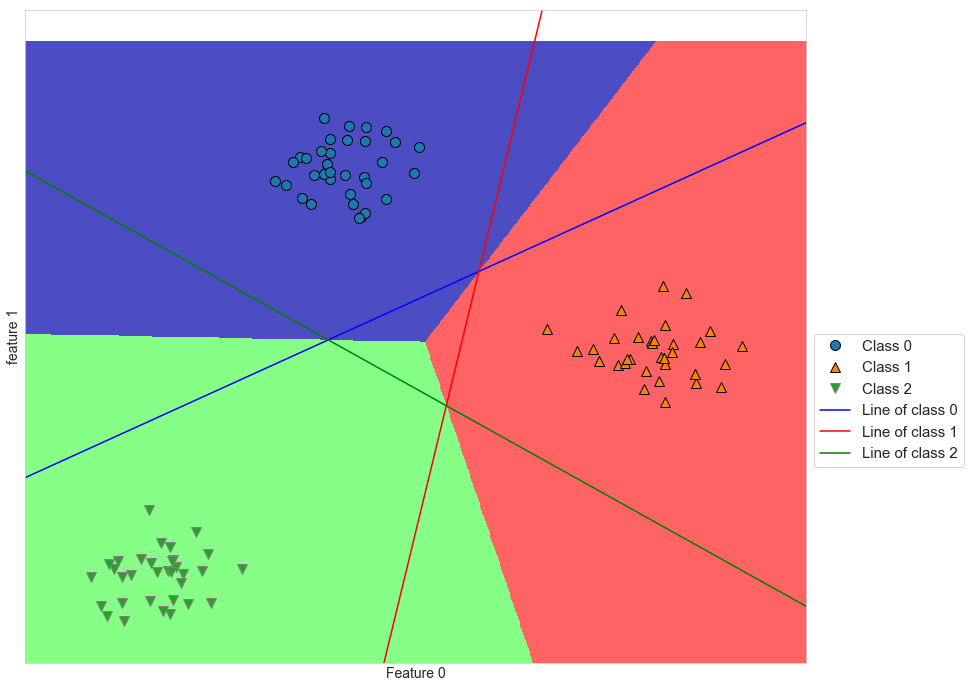

In [23]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line of class 0", "Line of class 1", "Line of class 2"], loc=(1.01, 0.3))

### solver='sag' in LogisticRegression in case of million samples. SGDClassifier, SGDRegressor.